<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/GRAPHVIZ01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from graphviz import Digraph
 
dot = Digraph(comment='The Test Table')
# 添加圆点A, A的标签是Dot A
dot.node('A', 'Dot A')
# 添加圆点B, B的标签是Dot B
dot.node('B', 'Dot B')
# dot.view()
# 添加圆点C, C的标签是Dot C
dot.node(name='C', label= 'Dot C',color='red')
# dot.view()
 
# 创建一堆边, 即连接AB的两条边, 连接AC的一条边
dot.edges(['AB', 'AC', 'AB'])
# dot.view()
# 在创建两圆点之间创建一条边
dot.edge('B', 'C', 'test')
# dot.view()
 
# 获取DOT source源码的字符串形式
print(dot.source)
dot.view()
dot.render('test-table.gv', view=True)

// The Test Table
digraph {
	A [label="Dot A"]
	B [label="Dot B"]
	C [label="Dot C" color=red]
	A -> B
	A -> C
	A -> B
	B -> C [label=test]
}



'test-table.gv.pdf'

In [3]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!ls

angles.gv	     Digraph.gv       g_c_n.gv.pdf	structs.gv.pdf
angles.gv.pdf	     Digraph.gv.pdf   hello.gv		test-table.gv
btree.gv	     drive	      hello.gv.pdf	test-table.gv.pdf
btree.gv.pdf	     er.gv	      image0.png	traffic_lights.gv
cluster_edge.gv      er.gv.pdf	      process.gv	traffic_lights.gv.pdf
cluster_edge.gv.pdf  fdpclust.gv      process.gv.pdf	unix.gv
cluster.gv	     fdpclust.gv.pdf  rank_same.gv	unix.gv.pdf
cluster.gv.pdf	     fsm.gv	      rank_same.gv.pdf
colors.gv	     fsm.gv.pdf       sample_data
colors.gv.pdf	     g_c_n.gv	      structs.gv


环境必须安装poppler，不然无法执行convert_from_path

In [5]:
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


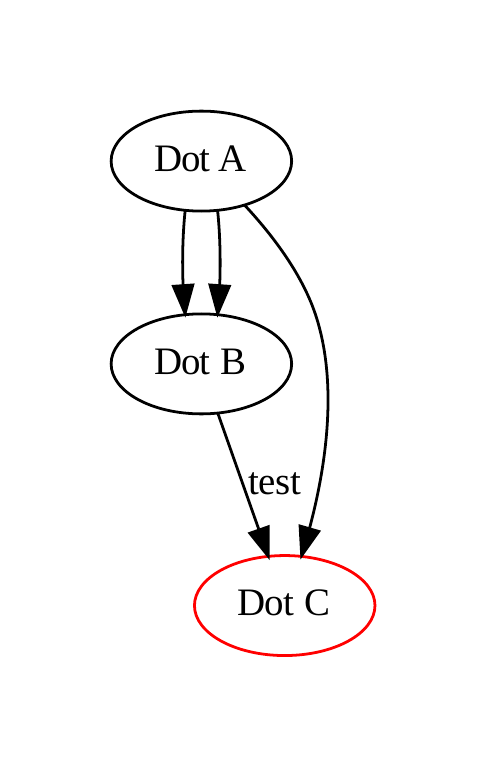

In [6]:
from pdf2image import convert_from_path

#FileNotFoundError
from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("test-table.gv.pdf")
images[0]  # first page

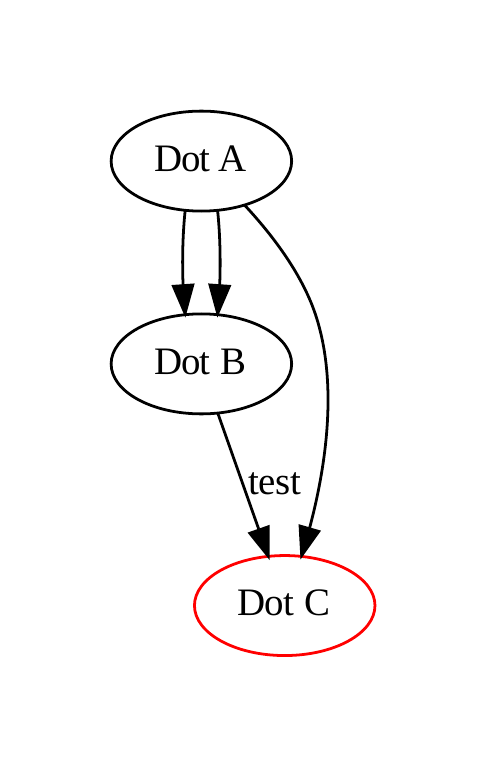

In [7]:
from pdf2image import convert_from_path
from IPython.display import display, Image

images = convert_from_path("test-table.gv.pdf")
for i, image in enumerate(images):    
    fname = "image" + str(i) + ".png"
    image.save(fname, "PNG")
Image(fname, width=600, height=600)

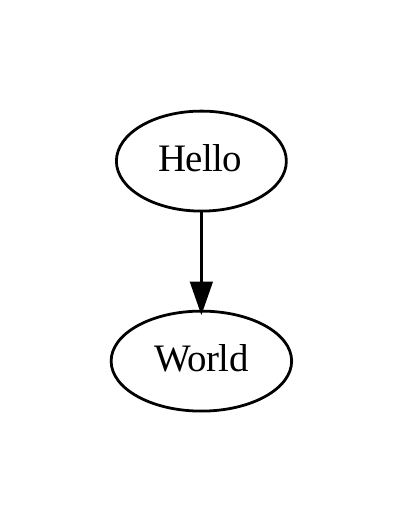

In [8]:
"""https://graphviz.org/Gallery/directed/hello.html"""

import graphviz

g = graphviz.Digraph('G', filename='hello.gv')

g.edge('Hello', 'World')

g.view()

from pdf2image import convert_from_path

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("hello.gv.pdf")
images[0]  # first page

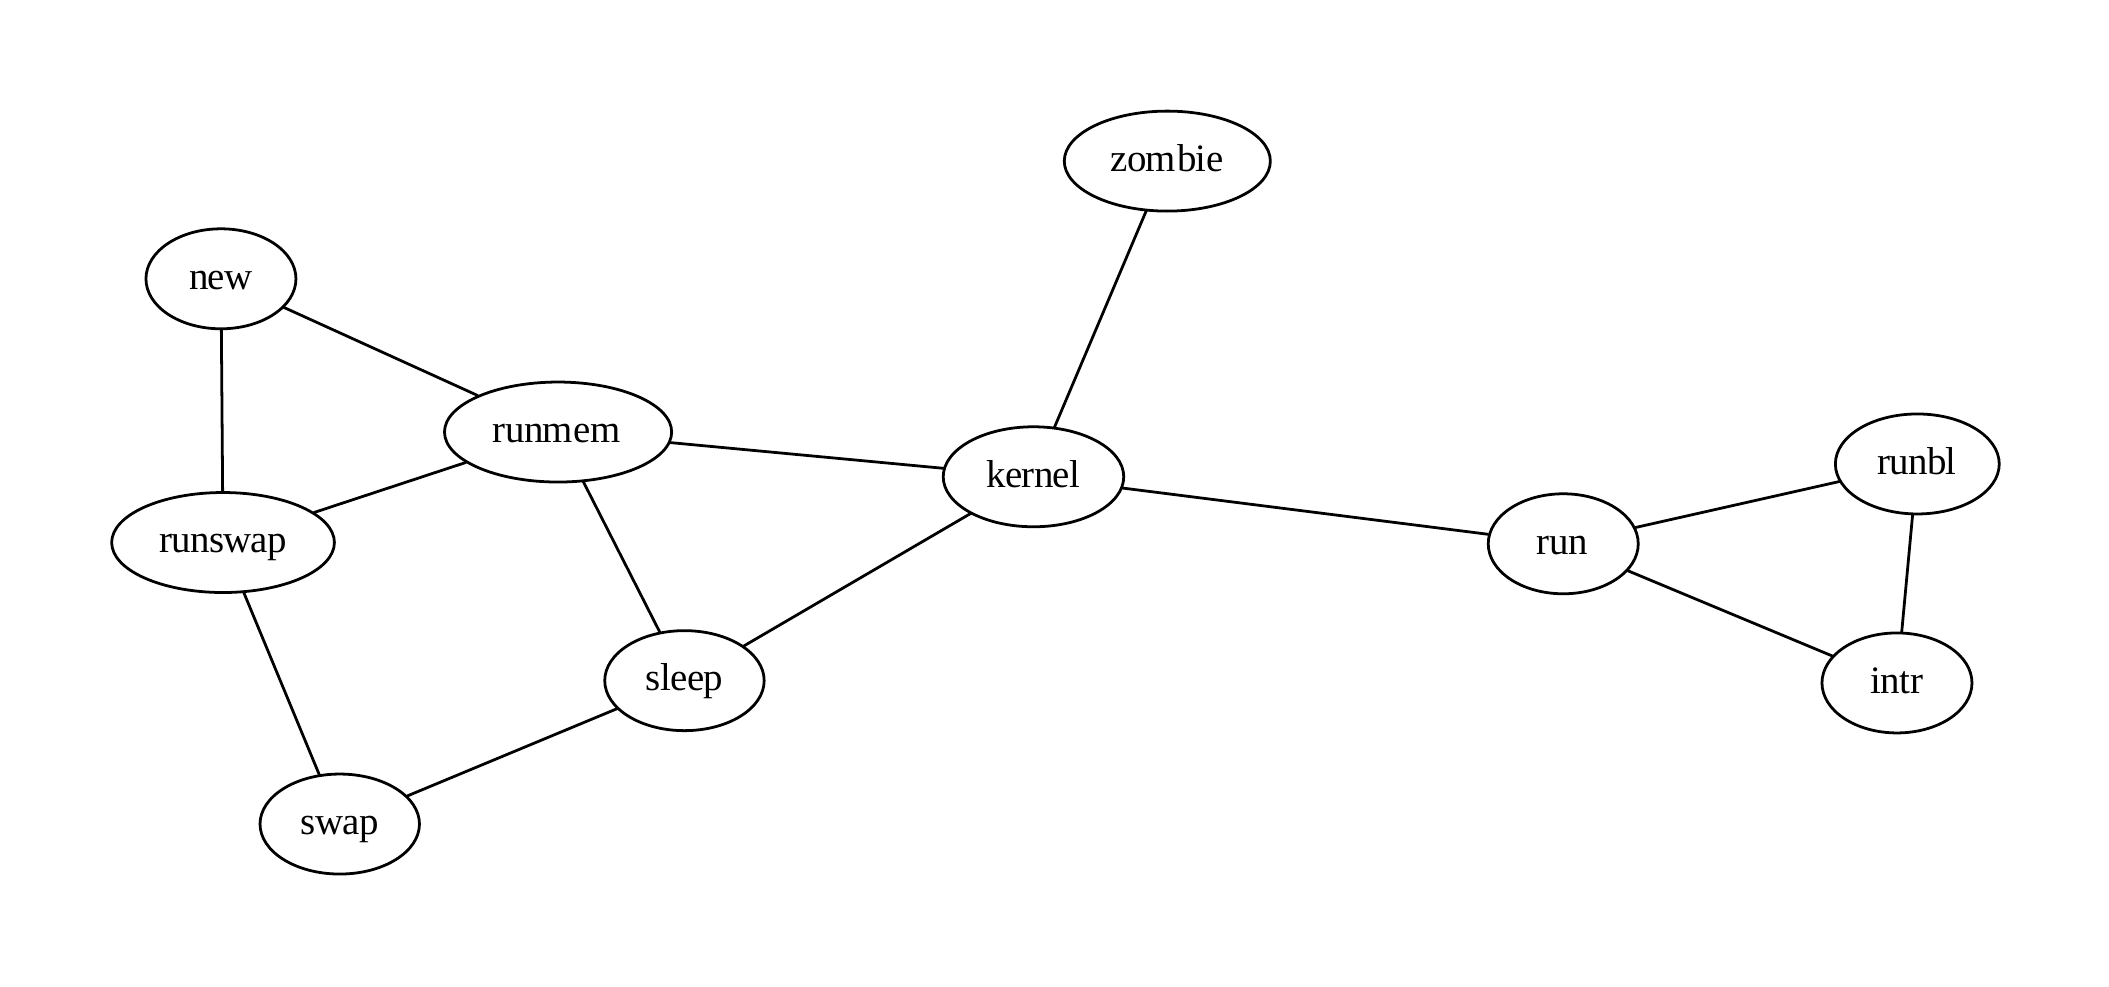

In [9]:
"""https://graphviz.org/Gallery/undirected/process.html"""

import graphviz

g = graphviz.Graph('G', filename='process.gv', engine='sfdp')

g.edge('run', 'intr')
g.edge('intr', 'runbl')
g.edge('runbl', 'run')
g.edge('run', 'kernel')
g.edge('kernel', 'zombie')
g.edge('kernel', 'sleep')
g.edge('kernel', 'runmem')
g.edge('sleep', 'swap')
g.edge('swap', 'runswap')
g.edge('runswap', 'new')
g.edge('runswap', 'runmem')
g.edge('new', 'runmem')
g.edge('sleep', 'runmem')

g.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("process.gv.pdf")
images[0]  # first page

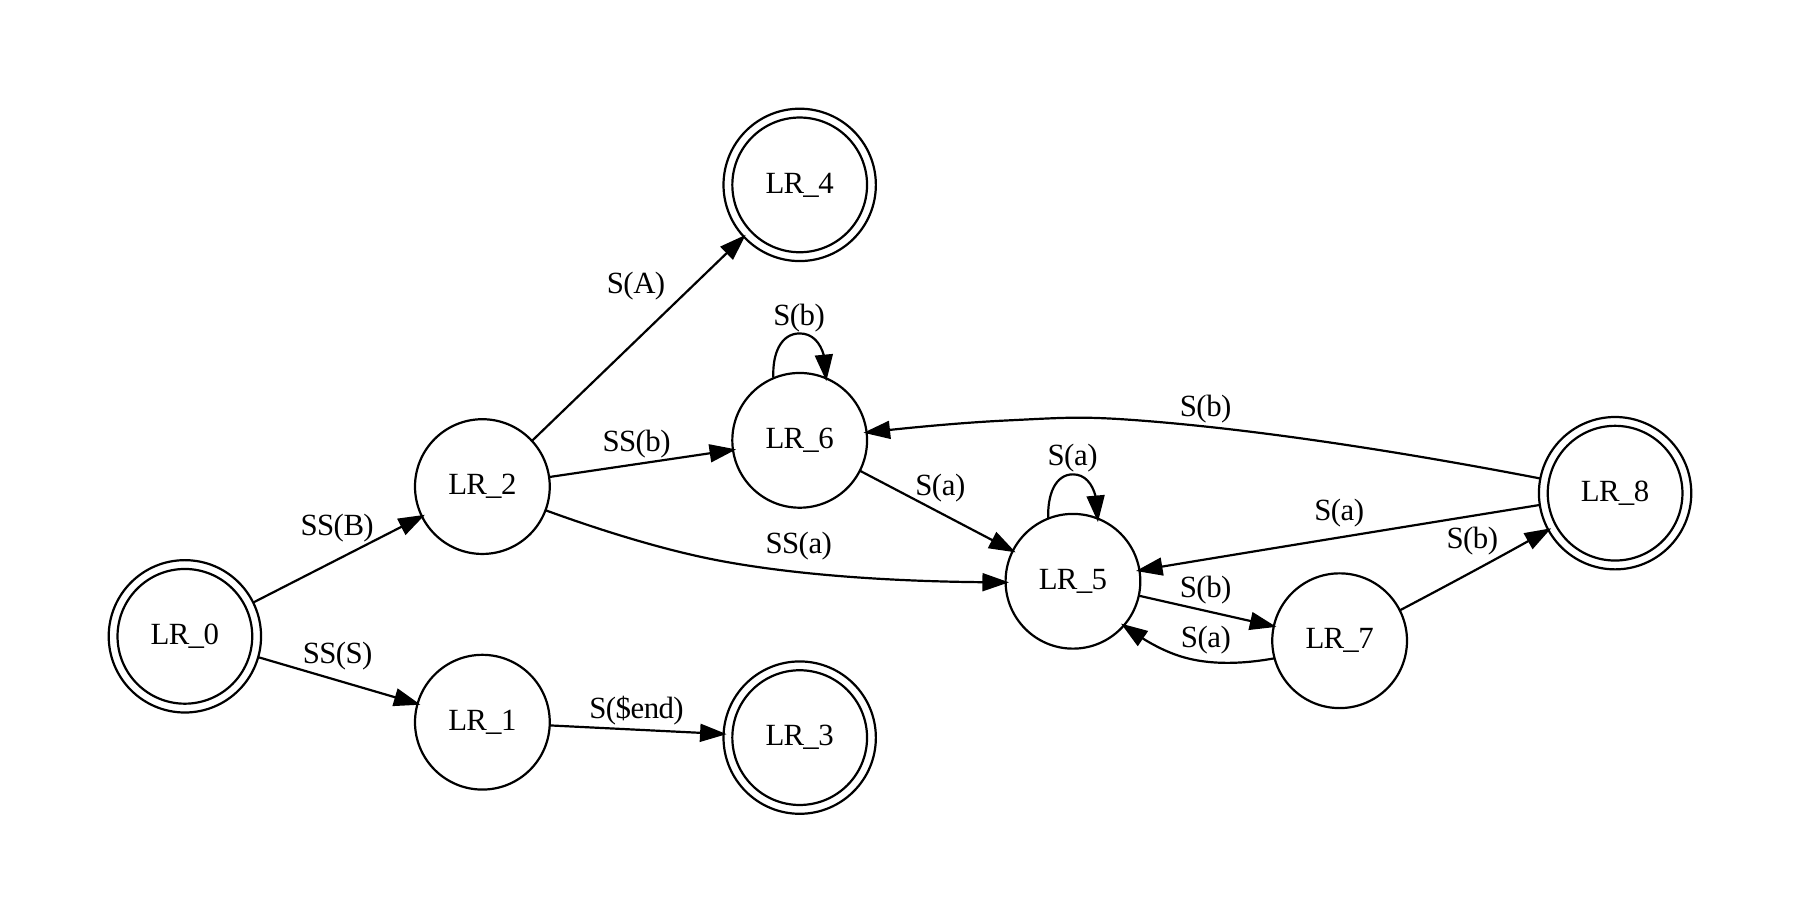

In [10]:
"""https://graphviz.org/Gallery/directed/fsm.html"""

import graphviz

f = graphviz.Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("fsm.gv.pdf")
images[0]  # first page

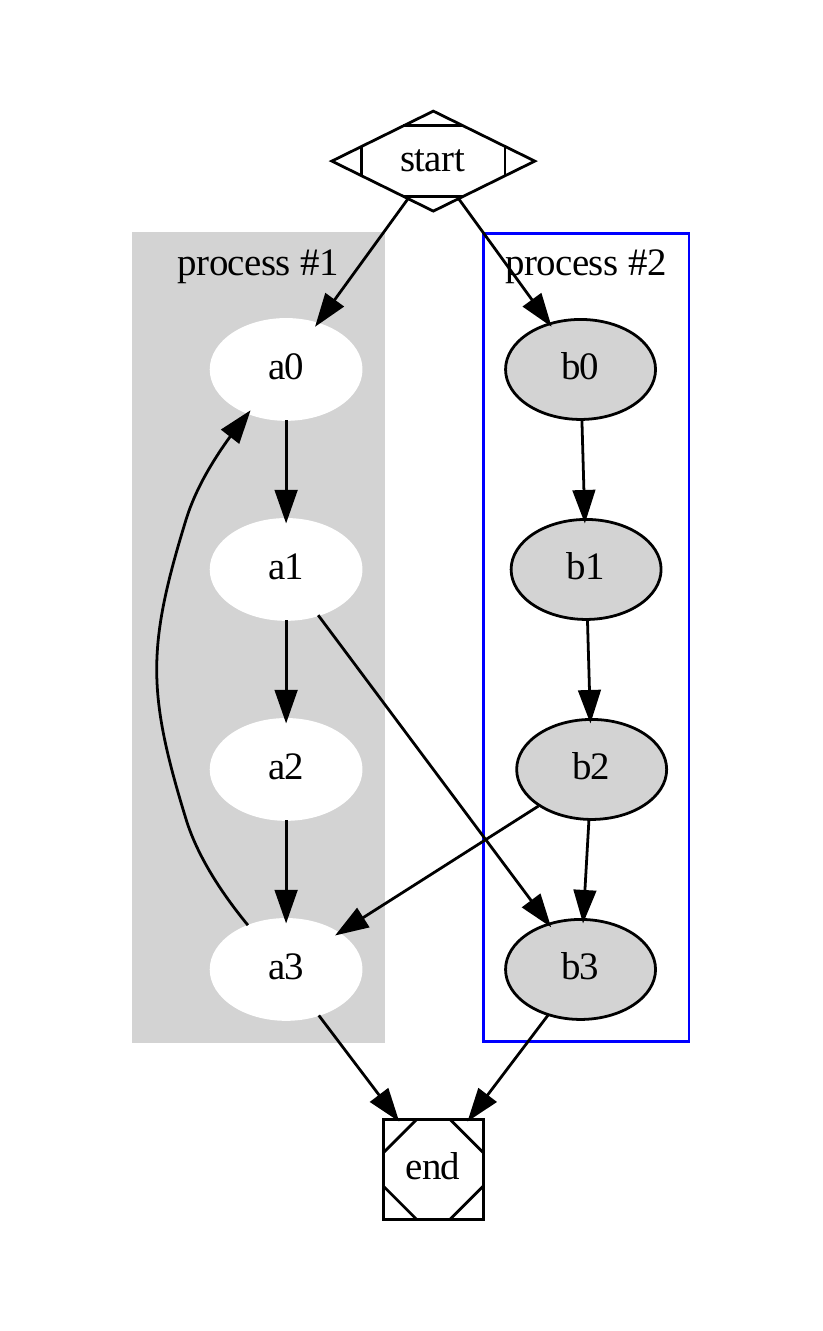

In [11]:
"""https://graphviz.org/Gallery/directed/cluster.html"""

from graphviz import Digraph

g = Digraph('G', filename='cluster.gv')

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

g.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("cluster.gv.pdf")
images[0]  # first page

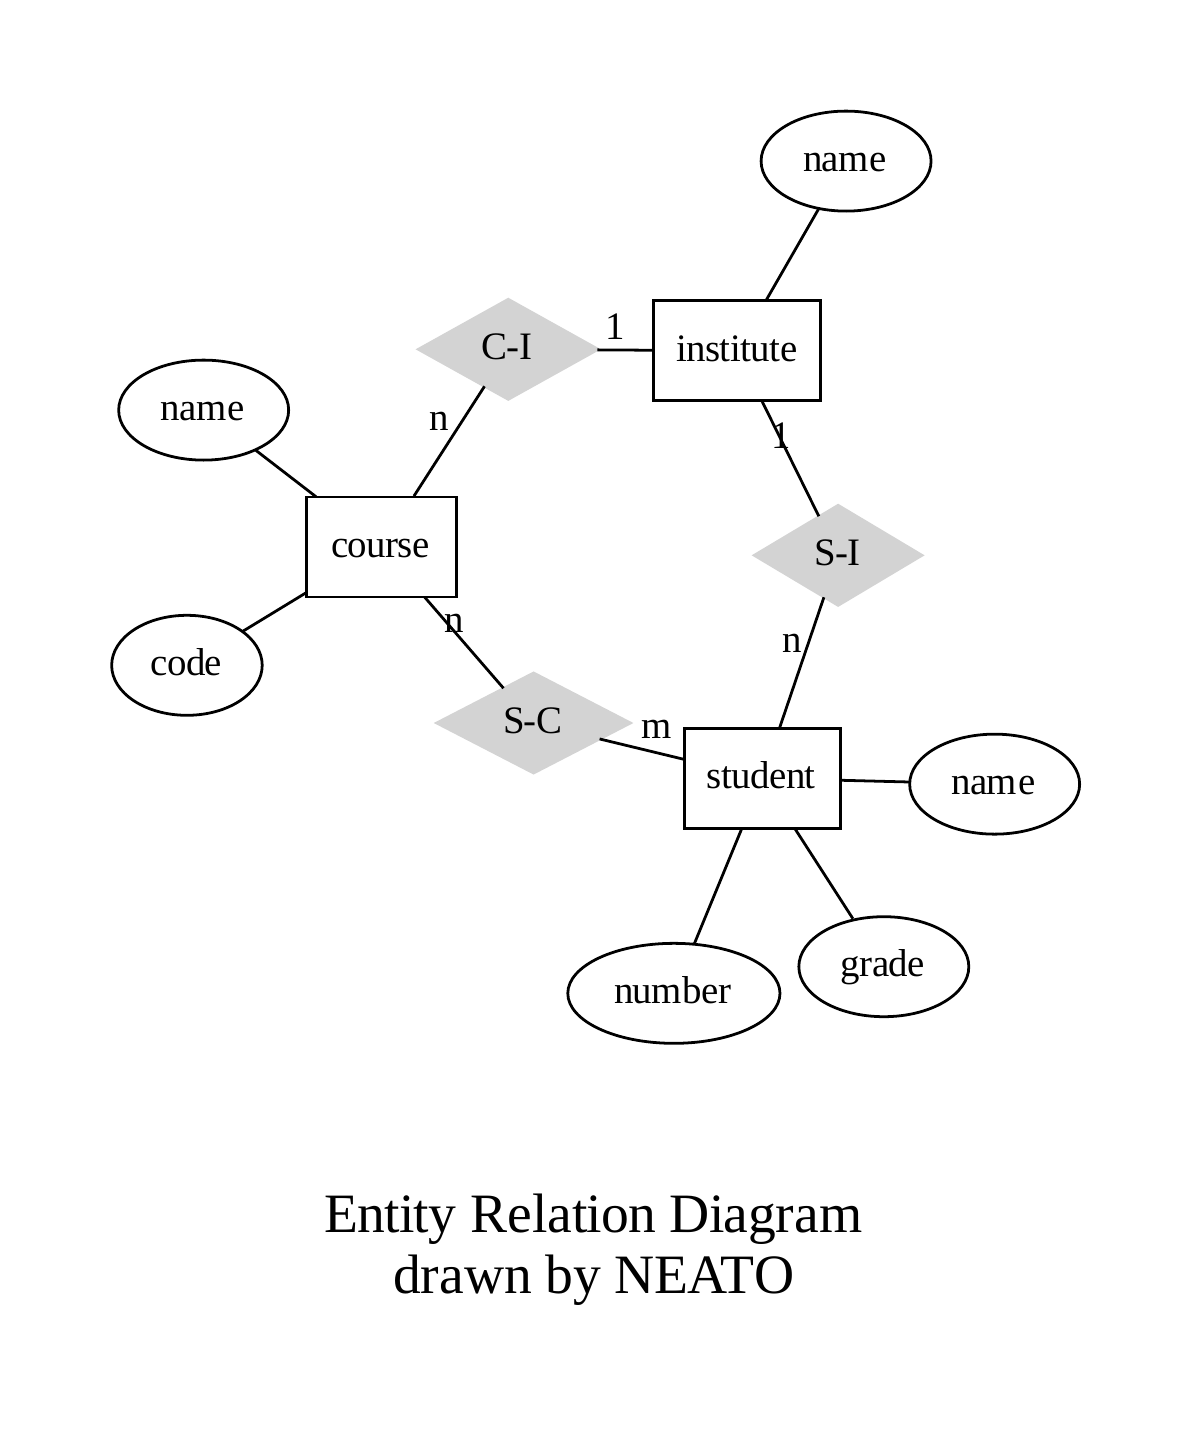

In [12]:
"""https://graphviz.org/Gallery/undirected/ER.html"""

import graphviz

e = graphviz.Graph('ER', filename='er.gv', engine='neato')

e.attr('node', shape='box')
e.node('course')
e.node('institute')
e.node('student')

e.attr('node', shape='ellipse')
e.node('name0', label='name')
e.node('name1', label='name')
e.node('name2', label='name')
e.node('code')
e.node('grade')
e.node('number')

e.attr('node', shape='diamond', style='filled', color='lightgrey')
e.node('C-I')
e.node('S-C')
e.node('S-I')

e.edge('name0', 'course')
e.edge('code', 'course')
e.edge('course', 'C-I', label='n', len='1.00')
e.edge('C-I', 'institute', label='1', len='1.00')
e.edge('institute', 'name1')
e.edge('institute', 'S-I', label='1', len='1.00')
e.edge('S-I', 'student', label='n', len='1.00')
e.edge('student', 'grade')
e.edge('student', 'name2')
e.edge('student', 'number')
e.edge('student', 'S-C', label='m', len='1.00')
e.edge('S-C', 'course', label='n', len='1.00')

e.attr(label=r'\n\nEntity Relation Diagram\ndrawn by NEATO')
e.attr(fontsize='20')

e.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("er.gv.pdf")
images[0]  # first page

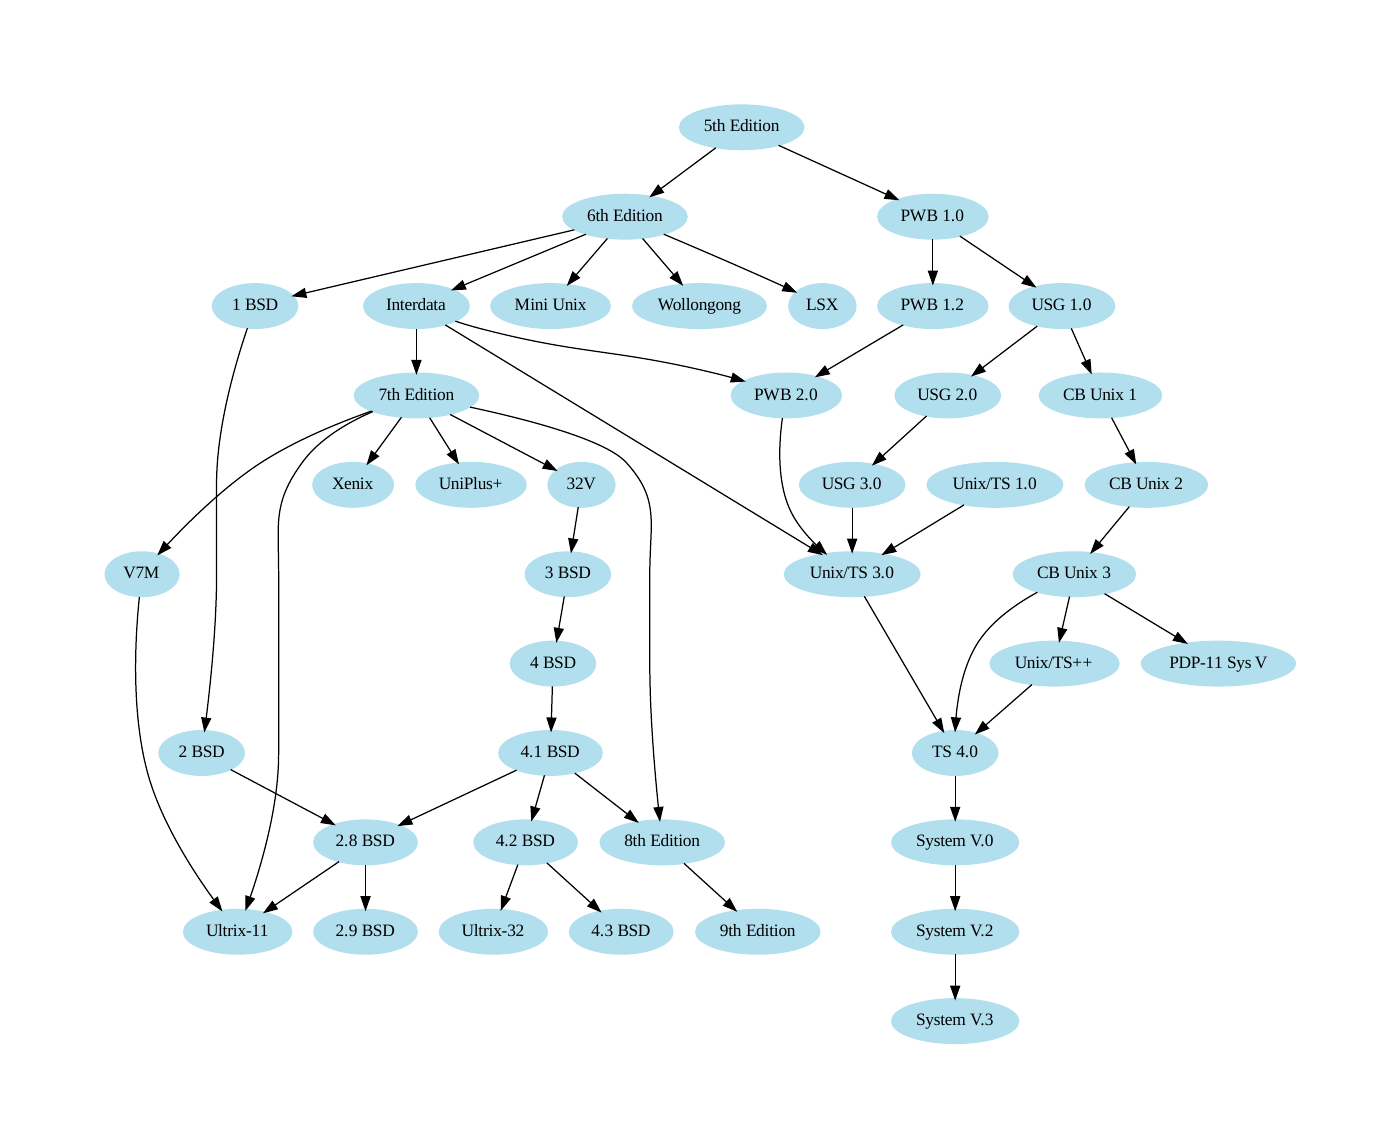

In [13]:
"""https://graphviz.org/Gallery/directed/unix.html"""

import graphviz

u = graphviz.Digraph('unix', filename='unix.gv',
                     node_attr={'color': 'lightblue2', 'style': 'filled'})
u.attr(size='6,6')

u.edge('5th Edition', '6th Edition')
u.edge('5th Edition', 'PWB 1.0')
u.edge('6th Edition', 'LSX')
u.edge('6th Edition', '1 BSD')
u.edge('6th Edition', 'Mini Unix')
u.edge('6th Edition', 'Wollongong')
u.edge('6th Edition', 'Interdata')
u.edge('Interdata', 'Unix/TS 3.0')
u.edge('Interdata', 'PWB 2.0')
u.edge('Interdata', '7th Edition')
u.edge('7th Edition', '8th Edition')
u.edge('7th Edition', '32V')
u.edge('7th Edition', 'V7M')
u.edge('7th Edition', 'Ultrix-11')
u.edge('7th Edition', 'Xenix')
u.edge('7th Edition', 'UniPlus+')
u.edge('V7M', 'Ultrix-11')
u.edge('8th Edition', '9th Edition')
u.edge('1 BSD', '2 BSD')
u.edge('2 BSD', '2.8 BSD')
u.edge('2.8 BSD', 'Ultrix-11')
u.edge('2.8 BSD', '2.9 BSD')
u.edge('32V', '3 BSD')
u.edge('3 BSD', '4 BSD')
u.edge('4 BSD', '4.1 BSD')
u.edge('4.1 BSD', '4.2 BSD')
u.edge('4.1 BSD', '2.8 BSD')
u.edge('4.1 BSD', '8th Edition')
u.edge('4.2 BSD', '4.3 BSD')
u.edge('4.2 BSD', 'Ultrix-32')
u.edge('PWB 1.0', 'PWB 1.2')
u.edge('PWB 1.0', 'USG 1.0')
u.edge('PWB 1.2', 'PWB 2.0')
u.edge('USG 1.0', 'CB Unix 1')
u.edge('USG 1.0', 'USG 2.0')
u.edge('CB Unix 1', 'CB Unix 2')
u.edge('CB Unix 2', 'CB Unix 3')
u.edge('CB Unix 3', 'Unix/TS++')
u.edge('CB Unix 3', 'PDP-11 Sys V')
u.edge('USG 2.0', 'USG 3.0')
u.edge('USG 3.0', 'Unix/TS 3.0')
u.edge('PWB 2.0', 'Unix/TS 3.0')
u.edge('Unix/TS 1.0', 'Unix/TS 3.0')
u.edge('Unix/TS 3.0', 'TS 4.0')
u.edge('Unix/TS++', 'TS 4.0')
u.edge('CB Unix 3', 'TS 4.0')
u.edge('TS 4.0', 'System V.0')
u.edge('System V.0', 'System V.2')
u.edge('System V.2', 'System V.3')

u.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("unix.gv.pdf")
images[0]  # first page


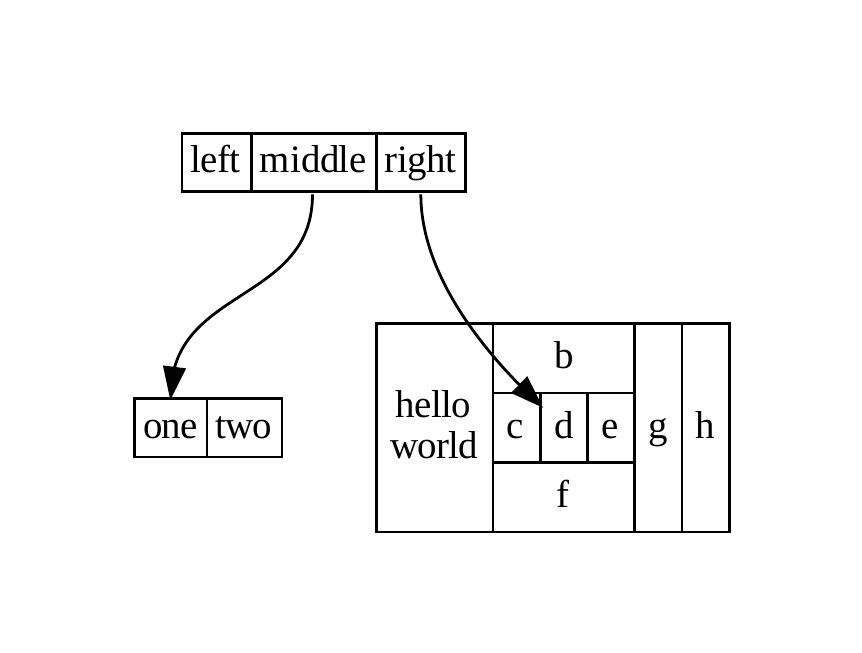

In [14]:
"""https://www.graphviz.org/doc/info/shapes.html#html"""

import graphviz

s = graphviz.Digraph('structs', filename='structs.gv',
                     node_attr={'shape': 'plaintext'})

s.node('struct1', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
  <TR>
    <TD>left</TD>
    <TD PORT="f1">middle</TD>
    <TD PORT="f2">right</TD>
  </TR>
</TABLE>>''')
s.node('struct2', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
  <TR>
    <TD PORT="f0">one</TD>
    <TD>two</TD>
  </TR>
</TABLE>>''')
s.node('struct3', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
  <TR>
    <TD ROWSPAN="3">hello<BR/>world</TD>
    <TD COLSPAN="3">b</TD>
    <TD ROWSPAN="3">g</TD>
    <TD ROWSPAN="3">h</TD>
  </TR>
  <TR>
    <TD>c</TD>
    <TD PORT="here">d</TD>
    <TD>e</TD>
  </TR>
  <TR>
    <TD COLSPAN="3">f</TD>
  </TR>
</TABLE>>''')

s.edges([('struct1:f1', 'struct2:f0'), ('struct1:f2', 'struct3:here')])

s.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("structs.gv.pdf")
images[0]  # first page


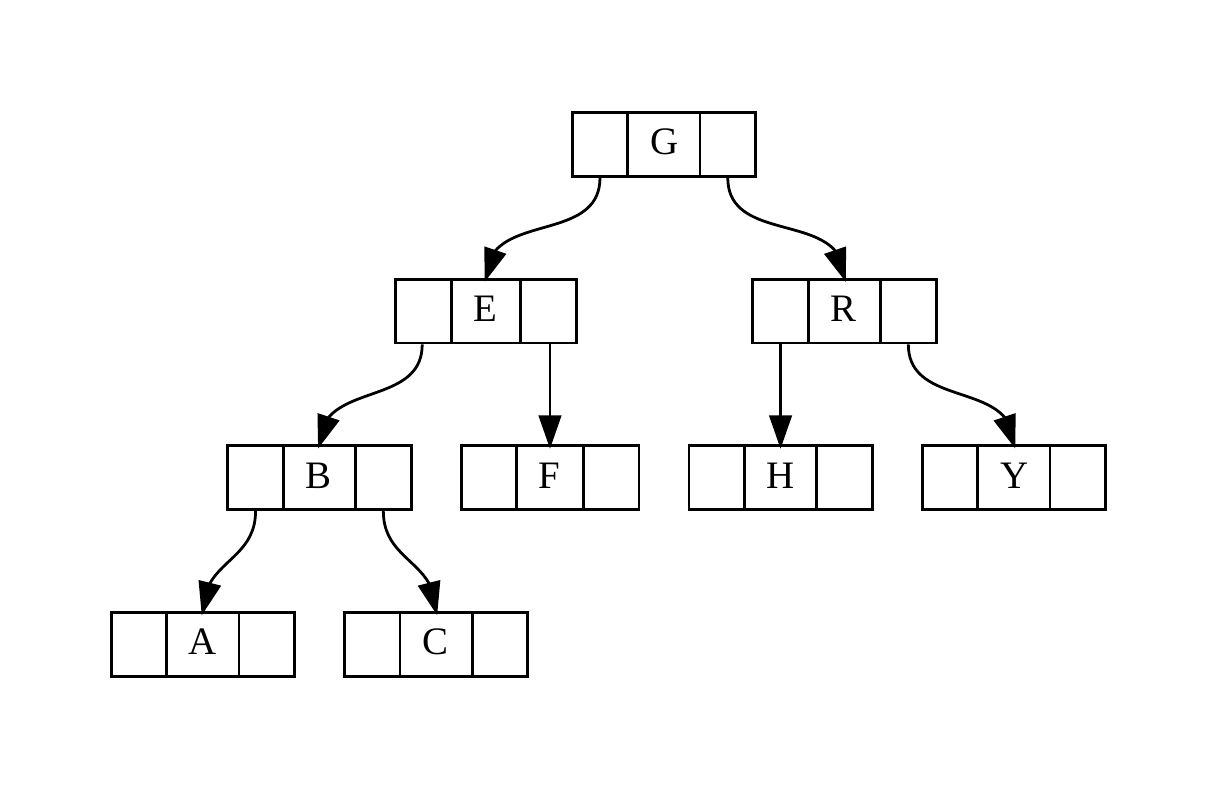

In [15]:
"""https://www.graphviz.org/pdf/dotguide.pdf, Figure 13"""

import graphviz
from graphviz import nohtml

g = graphviz.Digraph('g', filename='btree.gv',
                     node_attr={'shape': 'record', 'height': '.1'})

g.node('node0', nohtml('<f0> |<f1> G|<f2>'))
g.node('node1', nohtml('<f0> |<f1> E|<f2>'))
g.node('node2', nohtml('<f0> |<f1> B|<f2>'))
g.node('node3', nohtml('<f0> |<f1> F|<f2>'))
g.node('node4', nohtml('<f0> |<f1> R|<f2>'))
g.node('node5', nohtml('<f0> |<f1> H|<f2>'))
g.node('node6', nohtml('<f0> |<f1> Y|<f2>'))
g.node('node7', nohtml('<f0> |<f1> A|<f2>'))
g.node('node8', nohtml('<f0> |<f1> C|<f2>'))

g.edge('node0:f2', 'node4:f1')
g.edge('node0:f0', 'node1:f1')
g.edge('node1:f0', 'node2:f1')
g.edge('node1:f2', 'node3:f1')
g.edge('node2:f2', 'node8:f1')
g.edge('node2:f0', 'node7:f1')
g.edge('node4:f2', 'node6:f1')
g.edge('node4:f0', 'node5:f1')

g.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("btree.gv.pdf")
images[0]  # first page


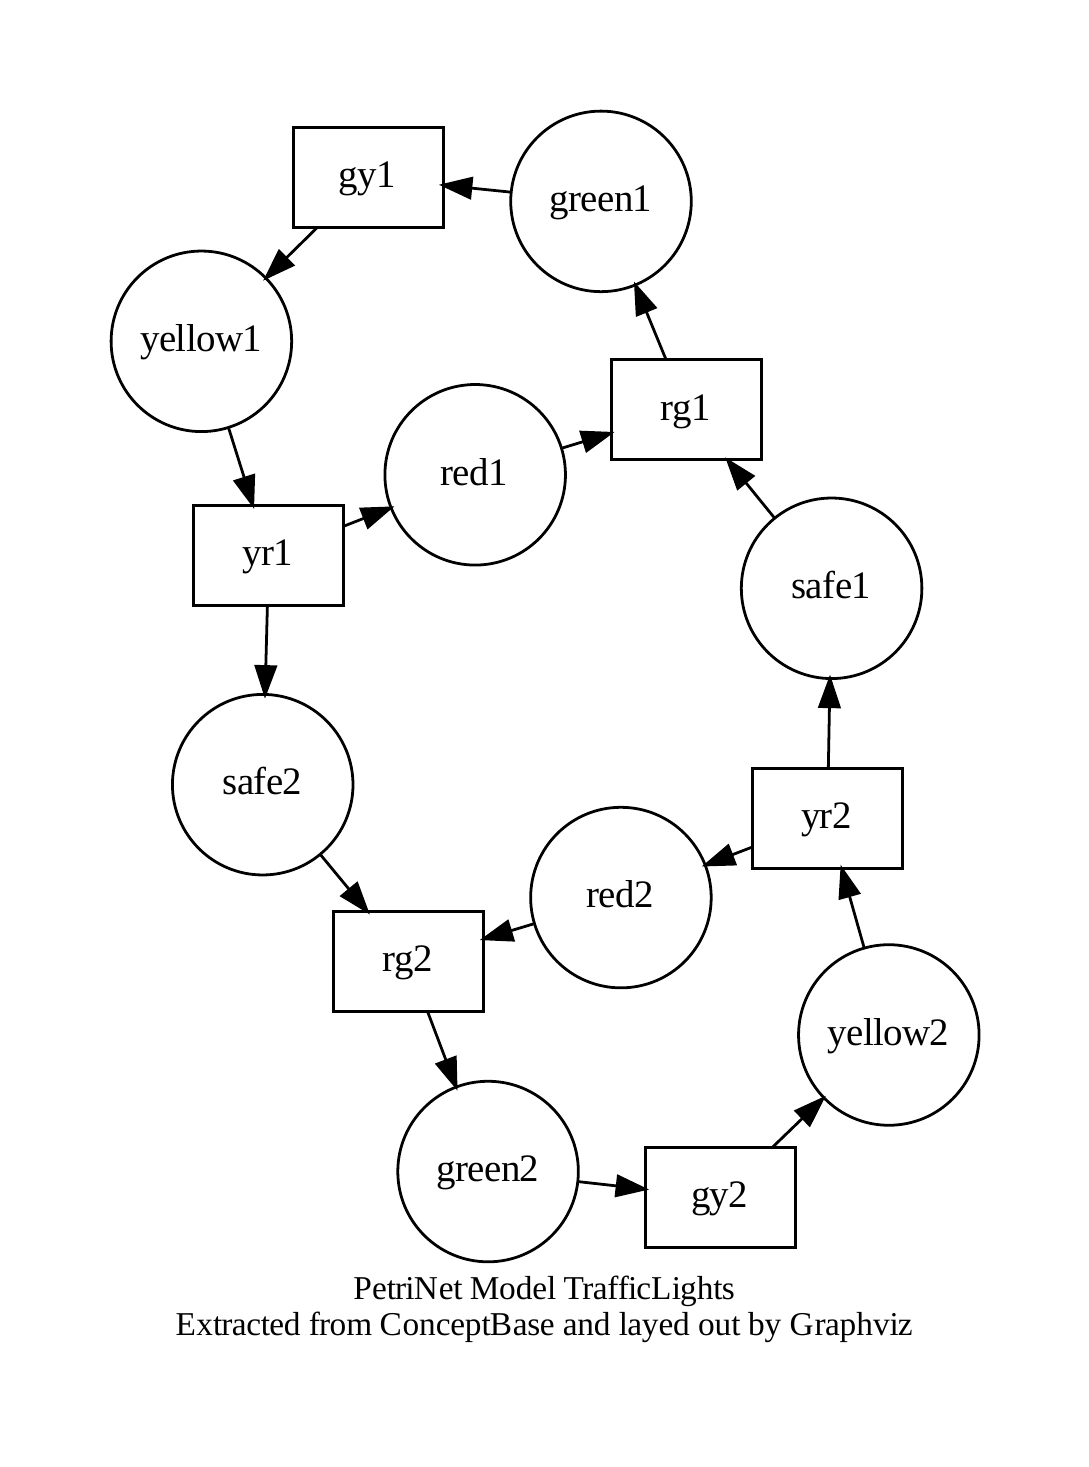

In [16]:
"""https://www.graphviz.org/Gallery/directed/traffic_lights.html"""

import graphviz

t = graphviz.Digraph('TrafficLights', filename='traffic_lights.gv',
                     engine='neato')

t.attr('node', shape='box')
for i in (2, 1):
    t.node(f'gy{i:d}')
    t.node(f'yr{i:d}')
    t.node(f'rg{i:d}')

t.attr('node', shape='circle', fixedsize='true', width='0.9')
for i in (2, 1):
    t.node(f'green{i:d}')
    t.node(f'yellow{i:d}')
    t.node(f'red{i:d}')
    t.node(f'safe{i:d}')

for i, j in [(2, 1), (1, 2)]:
    t.edge(f'gy{i:d}', f'yellow{i:d}')
    t.edge(f'rg{i:d}', f'green{i:d}')
    t.edge(f'yr{i:d}', f'safe{j:d}')
    t.edge(f'yr{i:d}', f'red{i:d}')
    t.edge(f'safe{i:d}', f'rg{i:d}')
    t.edge(f'green{i:d}', f'gy{i:d}')
    t.edge(f'yellow{i:d}', f'yr{i:d}')
    t.edge(f'red{i:d}', f'rg{i:d}')

t.attr(overlap='false')
t.attr(label=r'PetriNet Model TrafficLights\n'
             r'Extracted from ConceptBase and layed out by Graphviz')
t.attr(fontsize='12')

t.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("traffic_lights.gv.pdf")
images[0]  # first page


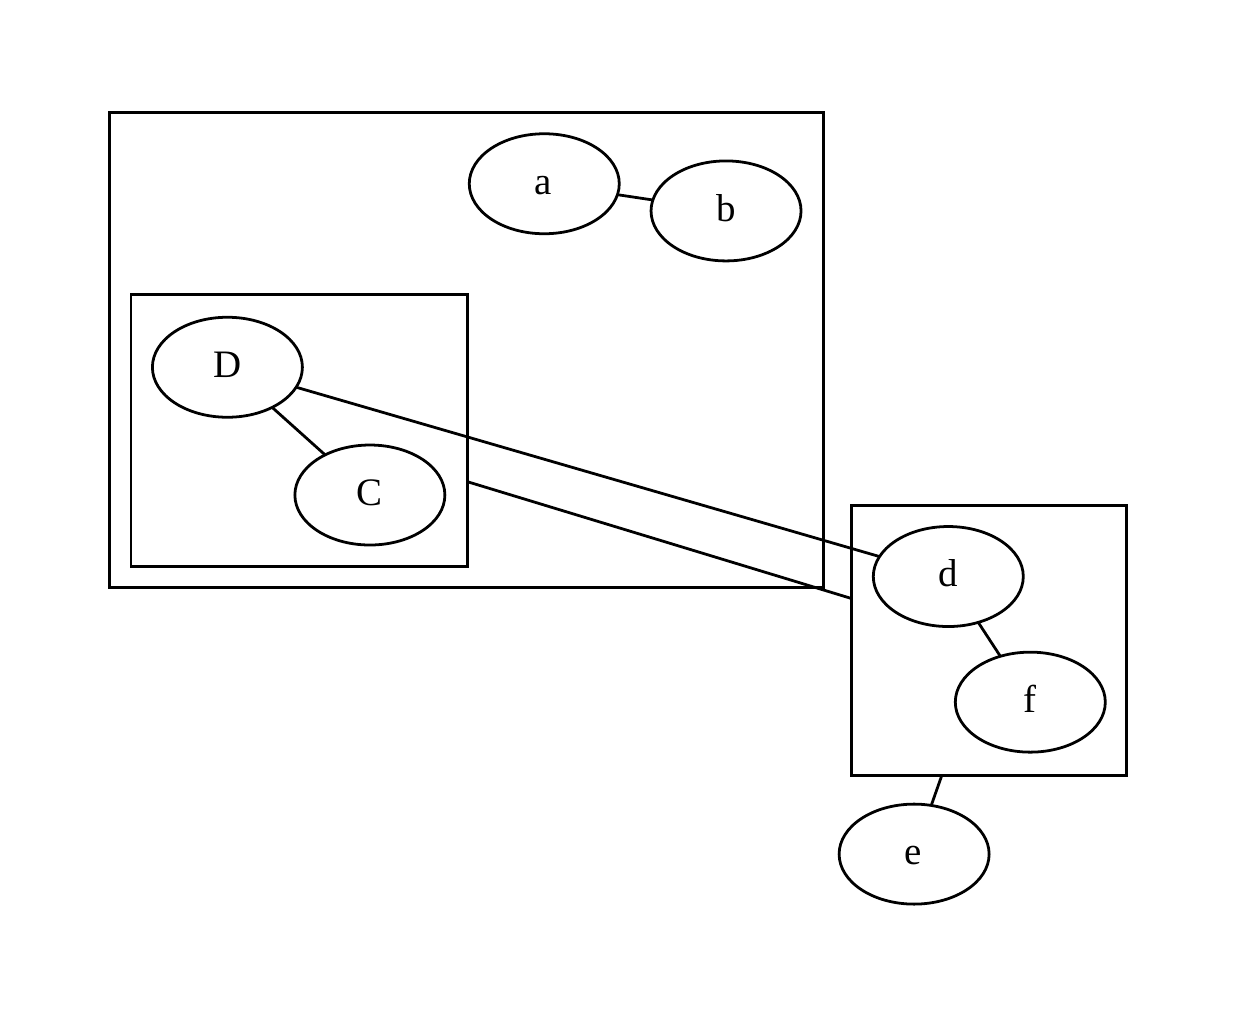

In [17]:
"""https://www.graphviz.org/Gallery/undirected/fdpclust.html"""

import graphviz

g = graphviz.Graph('G', filename='fdpclust.gv', engine='fdp')

g.node('e')

with g.subgraph(name='clusterA') as a:
    a.edge('a', 'b')
    with a.subgraph(name='clusterC') as c:
        c.edge('C', 'D')

with g.subgraph(name='clusterB') as b:
    b.edge('d', 'f')

g.edge('d', 'D')
g.edge('e', 'clusterB')
g.edge('clusterC', 'clusterB')

g.view()


#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("fdpclust.gv.pdf")
images[0]  # first page



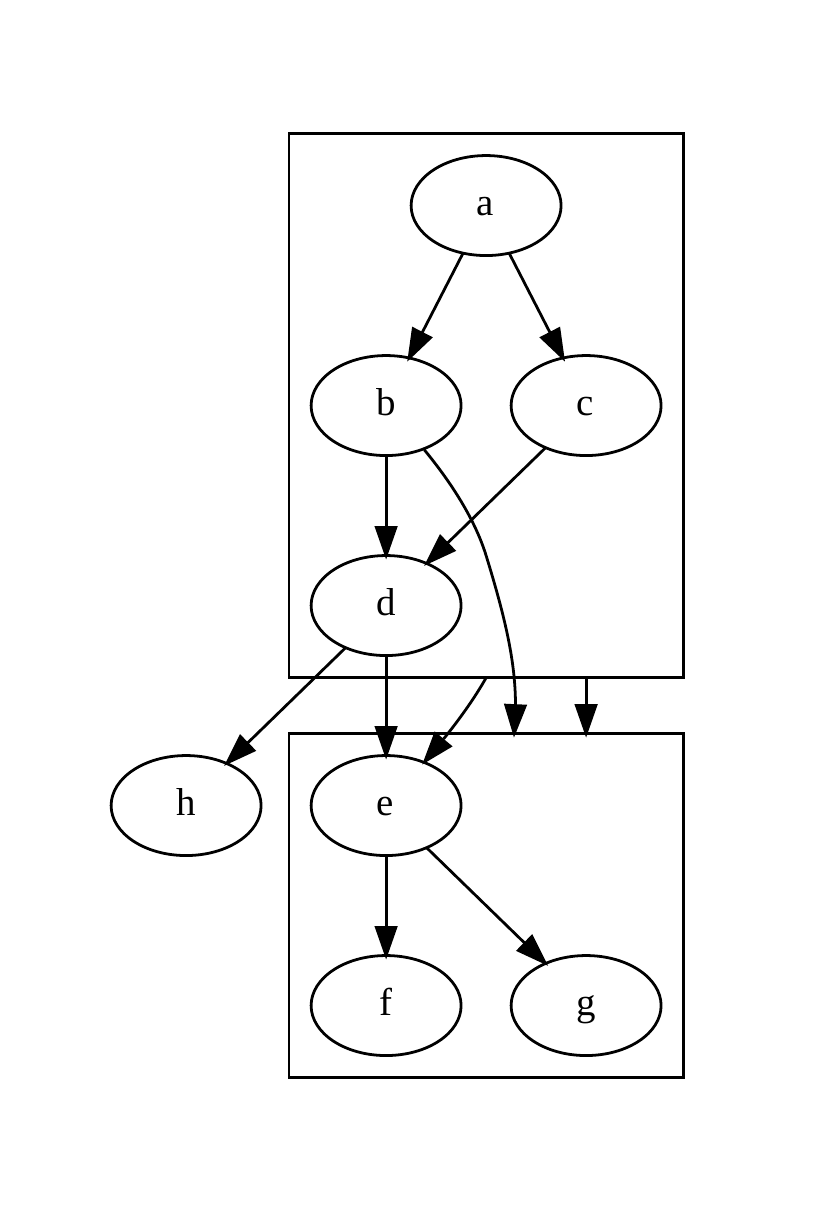

In [18]:
"""https://www.graphviz.org/pdf/dotguide.pdf, Figure 20"""

import graphviz

g = graphviz.Digraph('G', filename='cluster_edge.gv')
g.attr(compound='true')

with g.subgraph(name='cluster0') as c:
    c.edges(['ab', 'ac', 'bd', 'cd'])

with g.subgraph(name='cluster1') as c:
    c.edges(['eg', 'ef'])

g.edge('b', 'f', lhead='cluster1')
g.edge('d', 'e')
g.edge('c', 'g', ltail='cluster0', lhead='cluster1')
g.edge('c', 'e', ltail='cluster0')
g.edge('d', 'h')

g.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("cluster_edge.gv.pdf")
images[0]  # first page



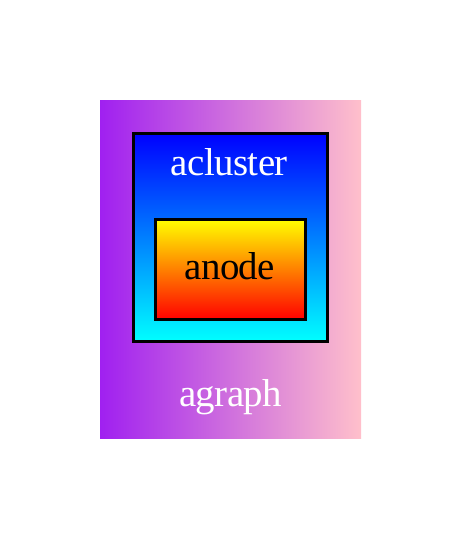

In [19]:
"""https://www.graphviz.org/Gallery/gradient/g_c_n.html"""

import graphviz

g = graphviz.Graph('G', filename='g_c_n.gv')
g.attr(bgcolor='purple:pink', label='agraph', fontcolor='white')

with g.subgraph(name='cluster1') as c:
    c.attr(fillcolor='blue:cyan', label='acluster', fontcolor='white',
           style='filled', gradientangle='270')
    c.attr('node', shape='box', fillcolor='red:yellow',
           style='filled', gradientangle='90')
    c.node('anode')

g.view()


#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("g_c_n.gv.pdf")
images[0]  # first page


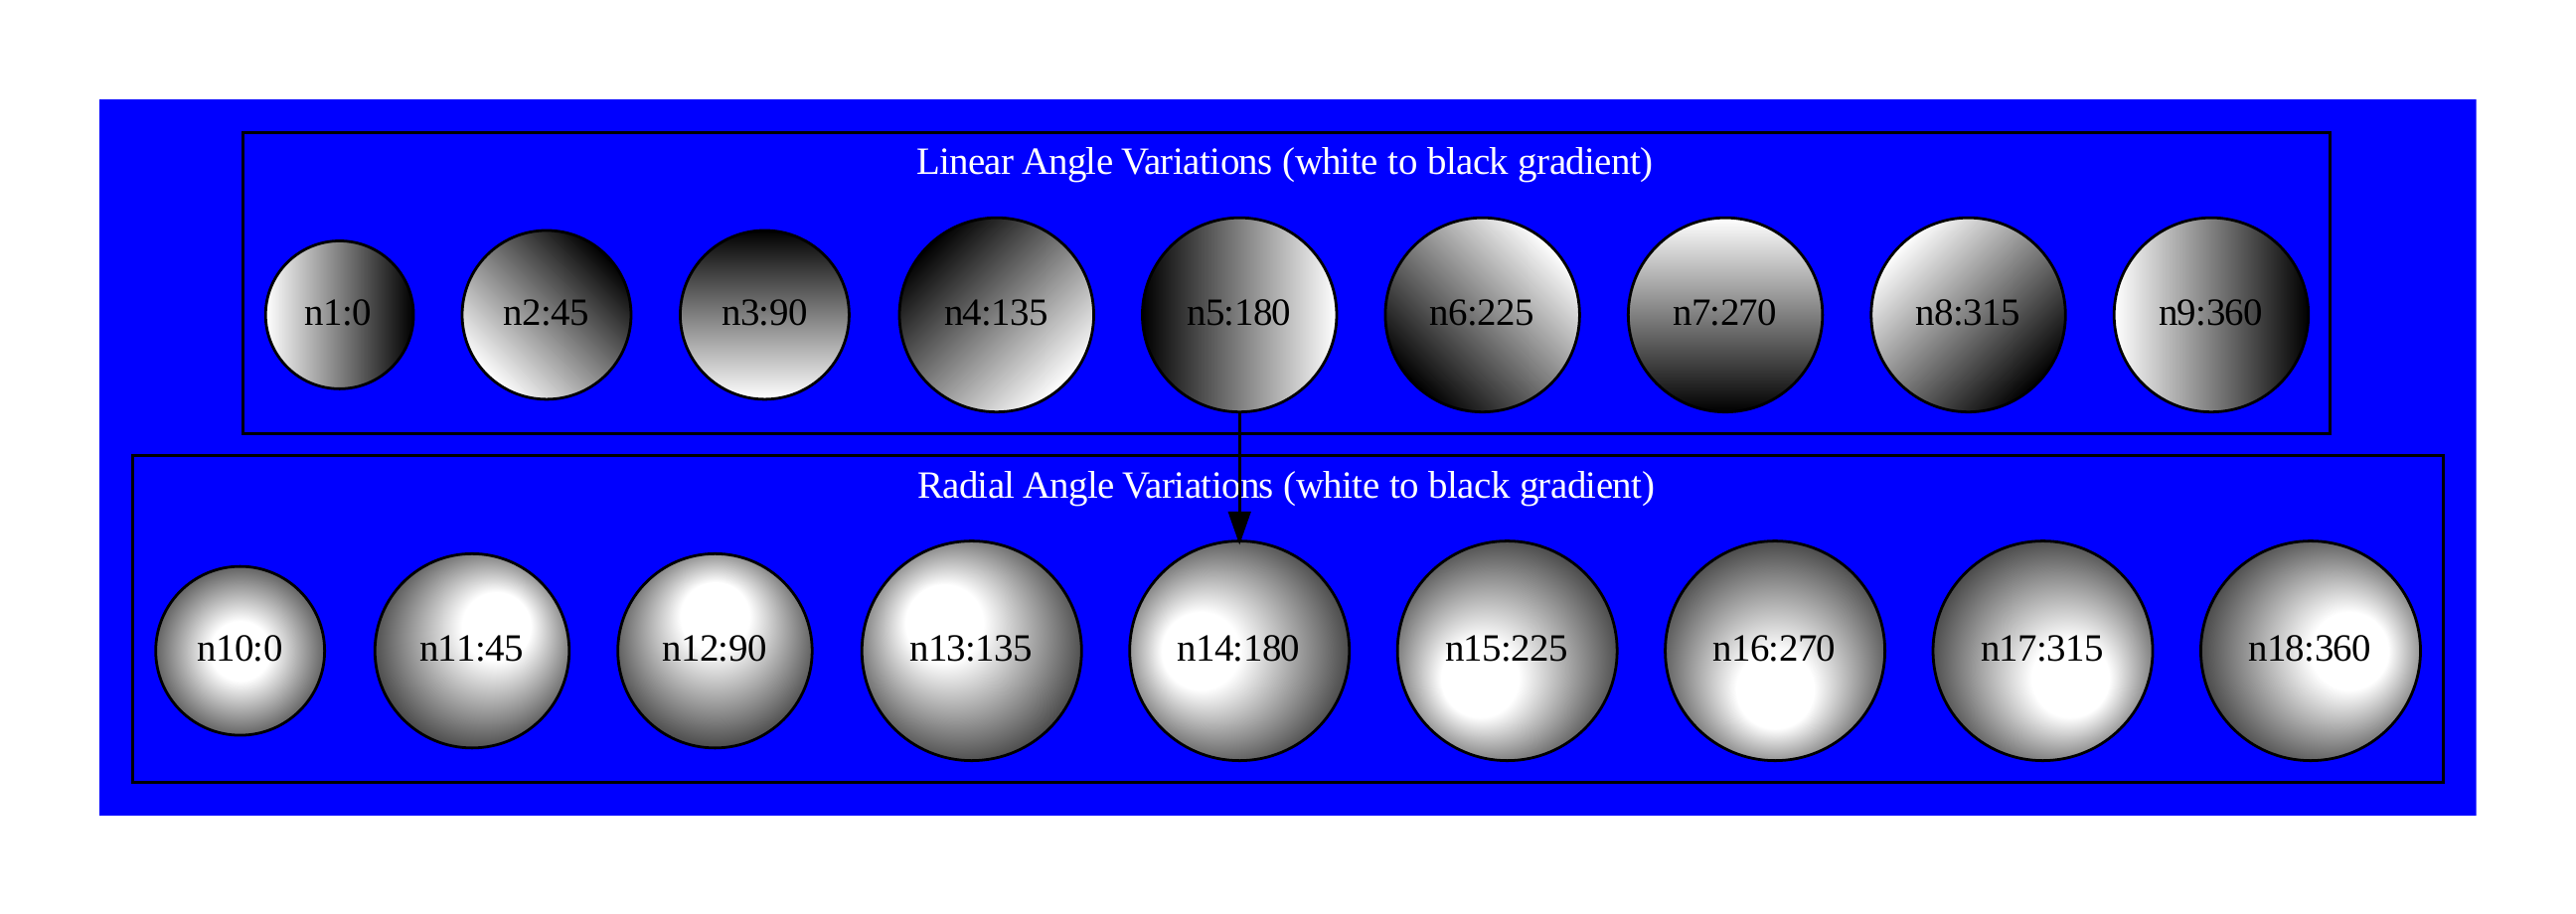

In [20]:
"""https://www.graphviz.org/Gallery/gradient/angles.html"""

import graphviz

g = graphviz.Digraph('G', filename='angles.gv')
g.attr(bgcolor='blue')

with g.subgraph(name='cluster_1') as c:
    c.attr(fontcolor='white')
    c.attr('node', shape='circle', style='filled', fillcolor='white:black',
           gradientangle='360', label='n9:360', fontcolor='black')
    c.node('n9')
    for i, a in zip(range(8, 0, -1), range(360 - 45, -1, -45)):
        c.attr('node', gradientangle=f'{a:d}', label=f'n{i:d}:{a:d}')
        c.node(f'n{i:d}')
    c.attr(label='Linear Angle Variations (white to black gradient)')

with g.subgraph(name='cluster_2') as c:
    c.attr(fontcolor='white')
    c.attr('node', shape='circle', style='radial', fillcolor='white:black',
           gradientangle='360', label='n18:360', fontcolor='black')
    c.node('n18')
    for i, a in zip(range(17, 9, -1), range(360 - 45, -1, -45)):
        c.attr('node', gradientangle=f'{a:d}', label=f'n{i:d}:{a:d}')
        c.node(f'n{i:d}')
    c.attr(label='Radial Angle Variations (white to black gradient)')

g.edge('n5', 'n14')

g.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("angles.gv.pdf")
images[0]  # first page


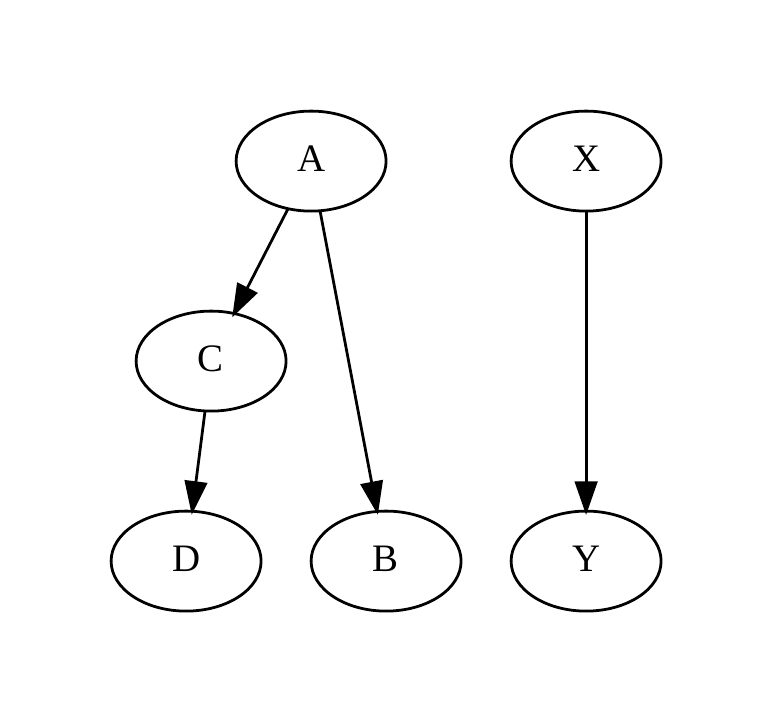

In [21]:
"""https://stackoverflow.com/questions/25734244/how-do-i-place-nodes-on-the-same-level-in-dot"""

import graphviz

d = graphviz.Digraph(filename='rank_same.gv')

with d.subgraph() as s:
    s.attr(rank='same')
    s.node('A')
    s.node('X')

d.node('C')

with d.subgraph() as s:
    s.attr(rank='same')
    s.node('B')
    s.node('D')
    s.node('Y')

d.edges(['AB', 'AC', 'CD', 'XY'])

d.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("rank_same.gv.pdf")
images[0]  # first page


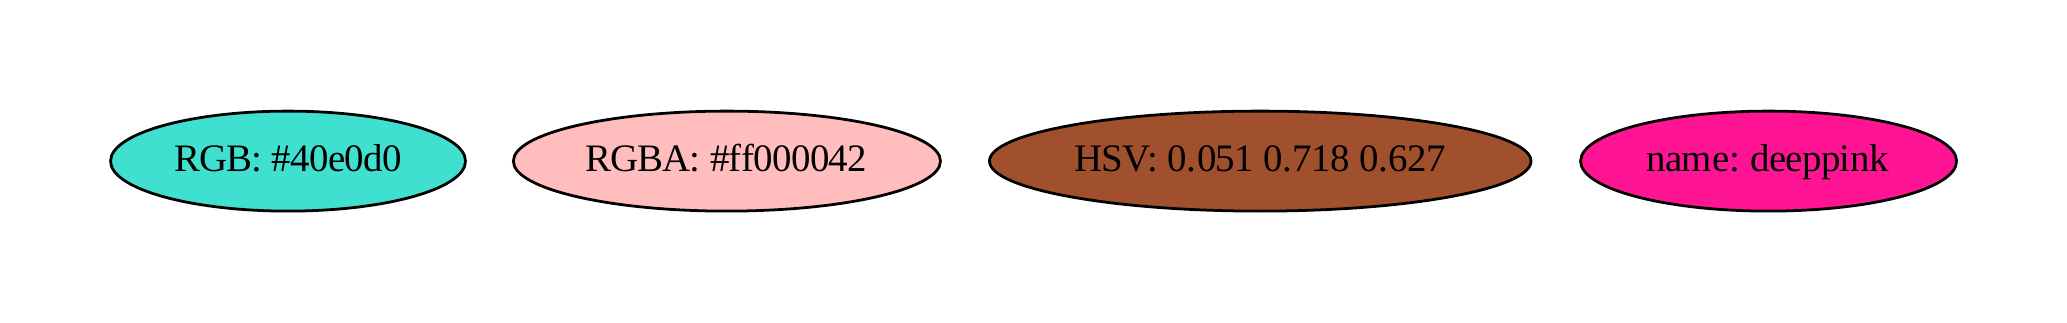

In [22]:
"""https://graphviz.org/docs/attr-types/color"""

import graphviz

g = graphviz.Graph(filename='colors.gv')

red, green, blue = 64, 224, 208
assert f'#{red:x}{green:x}{blue:x}' == '#40e0d0'

g.node('RGB: #40e0d0', style='filled', fillcolor='#40e0d0')

g.node('RGBA: #ff000042', style='filled', fillcolor='#ff000042')

g.node('HSV: 0.051 0.718 0.627', style='filled', fillcolor='0.051 0.718 0.627')

g.node('name: deeppink', style='filled', fillcolor='deeppink')

g.view()

#FileNotFoundError
#from google.colab import drive
#drive.mount('/content/drive')
images = convert_from_path("colors.gv.pdf")
images[0]  # first page